## Lecture Notes

### Concept of Images
- Electronic pictures on legacy CRTs are drawn by horizontal raster scans with the electron beam toggled on and off while a frame buffer supplies intensities.
- A frame captures a full image; an interlaced system transmits odd and even fields separately, so de-interlacing is needed when comb artefacts appear.
- Spatial resolution depends on sample counts: PAL used roughly 625 lines per frame, NTSC about 525, and digital classroom demos often work with 480 by 640 samples.
- Aspect ratios reflect human vision; 4:3 and 16:9 are the baseline canvases to consider when planning pixel layouts.
- Each pixel in an 8-bit greyscale array stores a value 0–255; editing matrix entries edits brightness at that location, so clipping past the range throws information away.
- Brightness adjustments add or subtract offsets, contrast tweaks multiply or divide by a gain—pair histograms with these operations to monitor dynamic range.

### Colour Fundamentals
- Colour is our perception of electromagnetic wavelengths; three cone types in the eye peak around red, green and blue, with overlapping sensitivities.
- Displays exploit additive mixing: equal maxima of red, green and blue yield nominal white, and pairs form magenta, cyan and yellow secondary colours.
- True colour images allocate 8 bits per channel (0–255) so neutral colours occur when all three channels match (for example 0,0,0 through 255,255,255).
- Saturation expresses how much white is mixed in; adding equal RGB values desaturates towards pastel hues, and Microsoft’s HSV variant caps saturation at 240.
- Hue is the angular position on the colour circle determined by the dominant channel; when the computed hue is negative add 360 degrees to wrap correctly.
- Multiple brightness proxies coexist: value equals max(R,G,B), intensity can be (R+G+B)/3, and the luma used for greyscale conversion is `Y = 0.3R + 0.59G + 0.11B`.
- Beyond RGB/HSV, remember YUV (luma and chrominance) and Lab (lightness plus opponent axes) when choosing colour spaces for processing.

### Colour Images in Practice
- Storing colour requires three aligned matrices—one per channel—so classroom examples use shapes like 480×640×3 or small toy arrays for experimentation.
- NumPy and image libraries index pixels as `[row, column, plane]`; keeping track of plane order (RGB vs BGR) avoids channel mix-ups.
- Building primary and secondary colours is just toggling planes to 255, and neutral swatches come from equal plane values; test this with handmade arrays.
- Human vision is more sensitive to green, so equal RGB triples will not look equally bright; compare HSV value slices with luma conversions via `cv2.cvtColor` to see the bias.
- Colour masking in HSV (for example isolating tulip reds with dual hue bands) shows how hue and saturation limits translate into practical segmentation.


### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Greyscale Ramp
- Generate a 0–255 horizontal ramp to see how 8-bit samples map to brightness, echoing the lecture focus on quantisation.
- Treat the result as a synthetic test pattern for later histogram and contrast experiments.

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

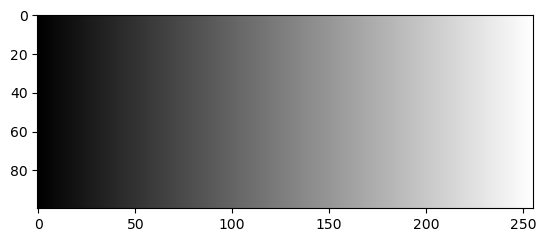

In [2]:
im = np.arange(256)
im = im[np.newaxis,:]
im = np.repeat(im,100,axis=0)
plt.imshow(im,cmap='gray')

# Processing Grayscale images

### Loading a Greyscale Asset
- Read the Einstein image so every matrix entry represents a pixel intensity between 0 and 255.
- Use this to rehearse how spatial resolution and sampling align with the CRT raster discussion.

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [3]:
im = plt.imread(r'Albert Einstein Document.jpg')

In [4]:
type(im)

numpy.ndarray

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [5]:
im.shape

(949, 728)

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [6]:
im.dtype

dtype('uint8')

### Displaying Grayscale
- Render the matrix with an explicit grayscale colormap to tie matrix edits back to perceptual brightness.

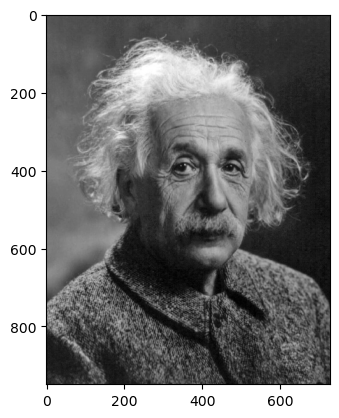

In [7]:
plt.imshow(im,cmap='gray')

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [8]:
im

array([[85, 85, 85, ..., 62, 62, 62],
       [85, 85, 85, ..., 64, 65, 64],
       [85, 85, 85, ..., 59, 59, 58],
       ...,
       [36, 42, 42, ..., 36, 42, 47],
       [29, 37, 37, ..., 36, 43, 44],
       [33, 40, 37, ..., 35, 43, 42]], shape=(949, 728), dtype=uint8)

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [9]:
im[23,300]

np.uint8(70)

In [10]:
im2 = im.copy() #make a copy. im can be read only.

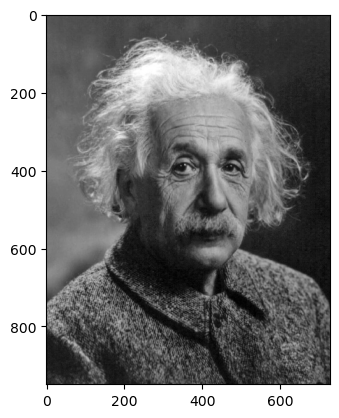

In [11]:
plt.imshow(im2,cmap='gray')

#Editing pixels

### Pixel Editing Practice
- Work on a writable copy so direct assignments illustrate brightness edits without corrupting the original.
- Observe how block edits reflect the matrix-to-image mapping emphasised in the slides.

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [12]:
im2[23,100] = 255

### Visualise Edits
- After modifying the copy, visualise the results to correlate matrix assignments with image regions.

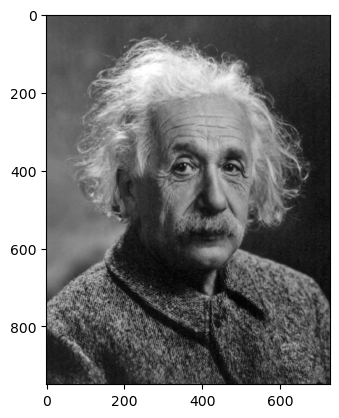

In [13]:
plt.imshow(im2,cmap='gray')

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [14]:
im2[20:100,40:100] = 255

### Visualise Edits
- After modifying the copy, visualise the results to correlate matrix assignments with image regions.

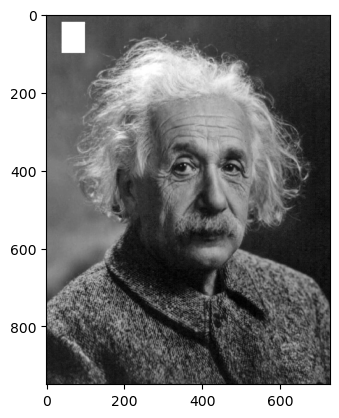

In [15]:
plt.imshow(im2,cmap='gray')

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [16]:
im2[300:400,40:100] = 255

### Visualise Edits
- After modifying the copy, visualise the results to correlate matrix assignments with image regions.

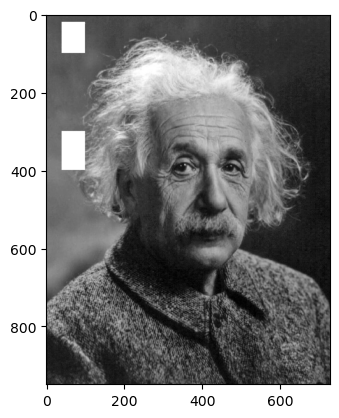

In [17]:
plt.imshow(im2,cmap='gray')

# Exercise:
* Put a square face mask on Albert. 
* can you improve the look of the face mask?

In [18]:
im2[420:620,300:520] = 0

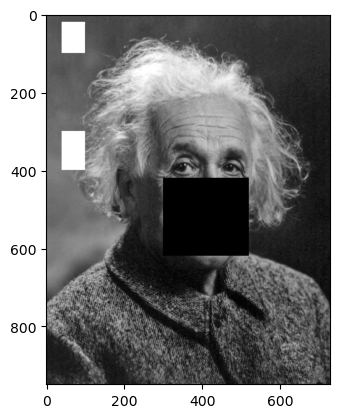

In [19]:
plt.imshow(im2,cmap='gray')

In [20]:
plt.imsave(r'albert-einstein_gray_modified.jpg',im2,cmap='gray')

# Grayscale Images in OpenCV

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [21]:
import cv2

### OpenCV Grayscale Read
- Contrast OpenCV's BGR-first approach with Matplotlib while reinforcing that the frame buffer still stores 8-bit samples.
- Note the dtype to ensure subsequent arithmetic respects the 0–255 range.

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [22]:
img = cv2.imread(r'Albert Einstein Document.jpg',cv2.IMREAD_GRAYSCALE)

In [23]:
type(img)

numpy.ndarray

### Array dtype Check
- Confirm intensity arrays use 8-bit or float types so operations (add, multiply) reflect the quantisation rules outlined in lecture.

In [24]:
img.dtype

dtype('uint8')

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [25]:
img.shape

(949, 728)

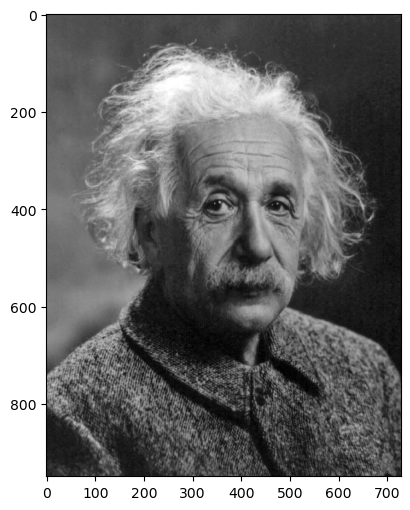

In [26]:
plt.figure(figsize = (10,6)) #control figure size. default unit of measure is inches and aspect ratio is maintained
plt.imshow(img,cmap='gray')

In [27]:
%conda install google-colab

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [28]:
import matplotlib.pyplot as plt

def cv2_imshow(img):
    plt.figure(figsize=(8, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img[..., ::-1])  # Convert BGR to RGB if needed
    plt.axis('off')
    plt.show()

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [29]:
img[500:700,500:600] = 255

### cv2 Display
- Use `cv2_imshow` for notebook display when OpenCV owns the array, reinforcing cross-tool workflows.

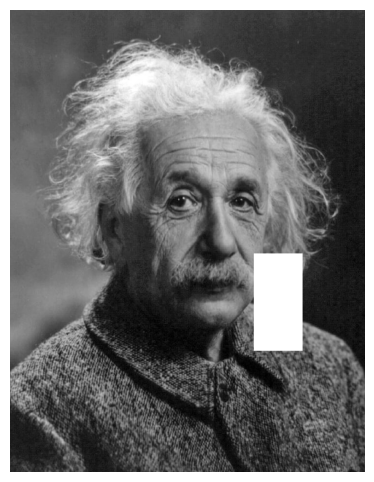

In [30]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Persist Modified Image
- Write altered data back to disk, highlighting that post-processed arrays can be exported as new assets.

In [31]:
cv2.imwrite(r'albert-einstein_gray_opencv.jpg',img)

True

#histogram

### Histogram Setup
- Import a practice frame so we can plot intensity histograms and relate them to contrast/brightness definitions from the lecture.

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [32]:
%conda install scikit-image

Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [33]:
img = plt.imread(r'Albert Einstein Document.jpg')
if img.dtype != np.uint8:
    img = (img * 255).astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.hist(img.ravel(), 256, [0, 256])  # im.ravel flattens the image to a single array
plt.show()

error: OpenCV(4.10.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_7eahtzy5v4/croot/opencv-suite_1752857035678/work/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


#changing brightness

In [ ]:
#increase brightness of image
img_brighter=cv2.add(img, 60)

### Brightness Comparison Grid
- Compare original vs brightened images plus histograms to visually confirm the constant shift discussed in theory.

/var/folders/2m/_pbnzmjx5b1_62wgrs9sglhw0000gn/T/ipykernel_74716/1458279976.py:16: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(),256,[0,256]); #im.ravel flatten the image to a single array
/var/folders/2m/_pbnzmjx5b1_62wgrs9sglhw0000gn/T/ipykernel_74716/1458279976.py:20: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_brighter.ravel(),256,[0,256]); #im.ravel flatten the image to a single array


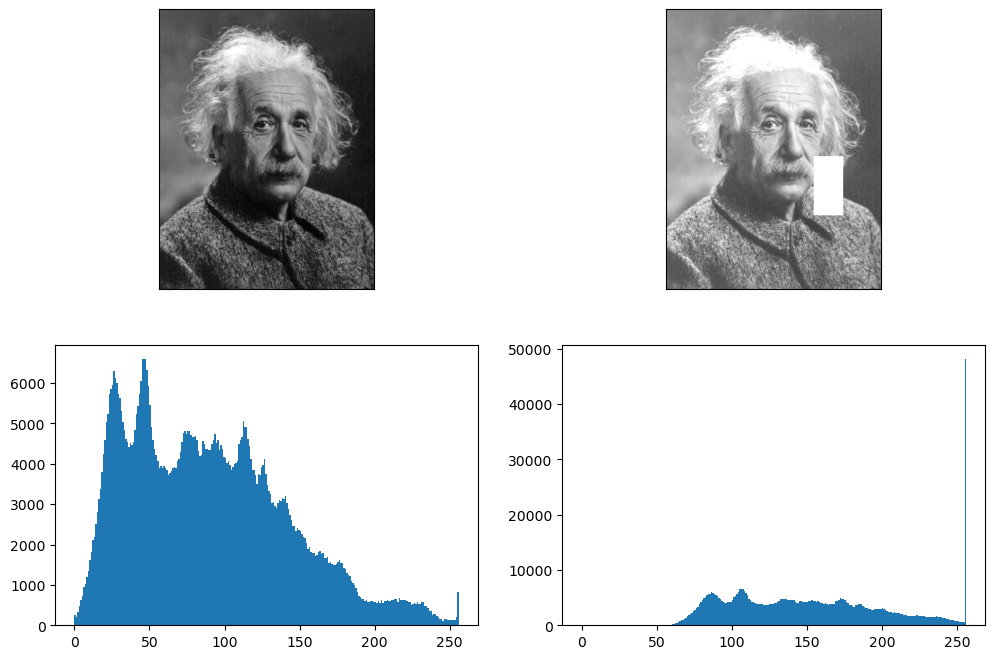

In [ ]:
plt.figure(figsize = (12,8))

plt.subplot(221)
#matplotlib will automatically adjust the contrast of the image. use vmix and vmax to disable the feature so we can see the correct results.
plt.imshow(img,cmap='gray',vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
#matplotlib will automatically adjust the contrast of the image. use vmix and vmax to disable the feature so we can see the correct results.
plt.imshow(img_brighter,cmap='gray',vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.hist(img.ravel(),256,[0,256]); #im.ravel flatten the image to a single array


plt.subplot(224)
plt.hist(img_brighter.ravel(),256,[0,256]); #im.ravel flatten the image to a single array



#changing contrast

### Contrast Gain
- Scale pixel deltas around zero to stretch dynamic range as discussed in the contrast section.
- Compare the before/after histograms to verify the widening without saturation.

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [ ]:
img_highercontrast=cv2.multiply(img, 1.4)

### Brightness Comparison Grid
- Compare original vs brightened images plus histograms to visually confirm the constant shift discussed in theory.

/var/folders/2m/_pbnzmjx5b1_62wgrs9sglhw0000gn/T/ipykernel_74716/210558277.py:15: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(),256,[0,256]); #im.ravel flatten the image to a single array
/var/folders/2m/_pbnzmjx5b1_62wgrs9sglhw0000gn/T/ipykernel_74716/210558277.py:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img_highercontrast.ravel(),256,[0,256]); #im.ravel flatten the image to a single array


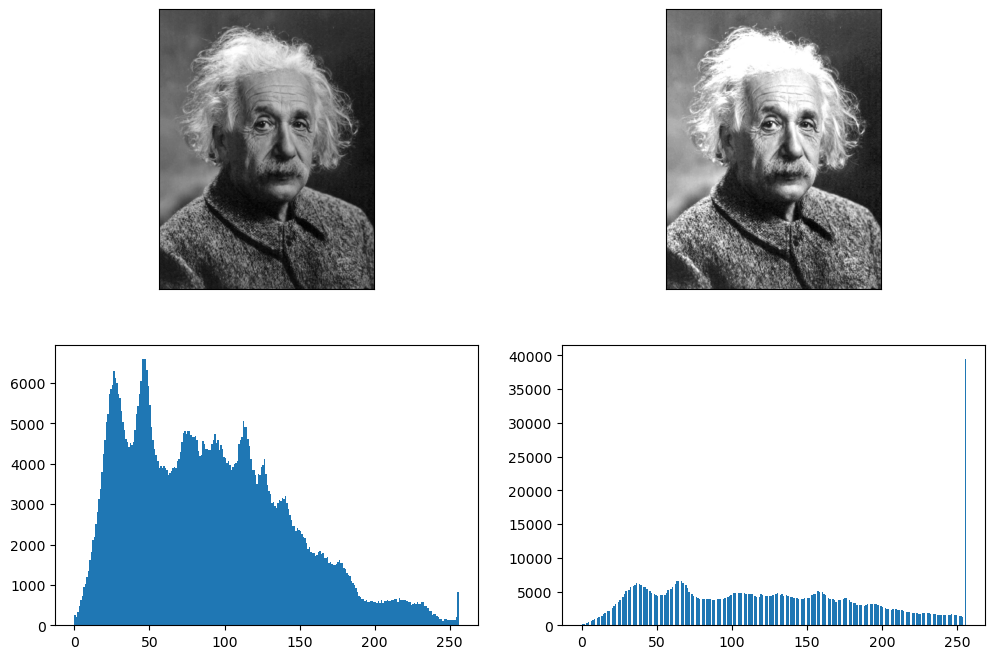

In [ ]:
plt.figure(figsize = (12,8))

plt.subplot(221)
#matplotlib will automatically adjust the contrast of the image. use vmix and vmax to disable the feature so we can see the correct results.
plt.imshow(img,cmap='gray',vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(img_highercontrast,cmap='gray',vmin=0, vmax=255)
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.hist(img.ravel(),256,[0,256]); #im.ravel flatten the image to a single array

plt.subplot(224)
plt.hist(img_highercontrast.ravel(),256,[0,256]); #im.ravel flatten the image to a single array

# RGB Images

### Colour Image Import
- Load a three-channel array where each plane is a primary colour, aligning with the additive mixing theory.
- Inspect the shape `(rows, cols, 3)` to connect with the 480×640×3 classroom examples.

In [ ]:
cim = plt.imread(r'tulips.jpg')

### View Colour Image
- Display the RGB photo to observe additive mixing results before dissecting channels.

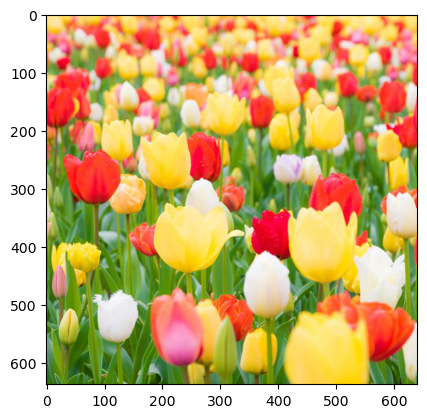

In [ ]:
plt.imshow(cim)

### Colour Array Dimensions
- Check the shape to ensure the third axis corresponds to the three primary colour planes.

In [ ]:
cim.shape

(638, 640, 3)

### Array Type
- Confirm the data structure (`numpy.ndarray`) underpinning colour images mirrors greyscale handling.

In [ ]:
type(cim) #The N-dimensional array

numpy.ndarray

### Colour dtype
- Inspect dtype (uint8/float) for context on channel range and scaling requirements.

In [ ]:
cim.dtype

dtype('uint8')

### Primary Stripes Experiment
- Build synthetic red, green, and blue bands to confirm how pure primaries appear on screen.
- Use this to reason about which stripe the eye perceives as brightest, tying back to cone sensitivity.

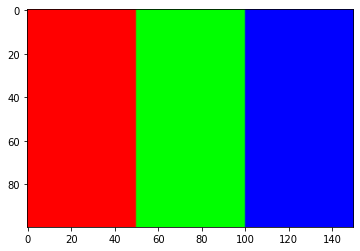

In [ ]:
rgb = np.zeros((100,150,3), dtype='uint8')
rgb[:,0:50,0] = 255 # red
rgb[:,50:100,1] = 255 #green
rgb[:,100:150,2] = 255 #blue
 
plt.imshow(rgb)

### cv2 Primary Display
- Use OpenCV display for the synthetic RGB stripes to note brightness differences across primaries.

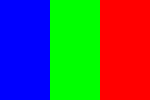

In [ ]:
cv2_imshow(rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

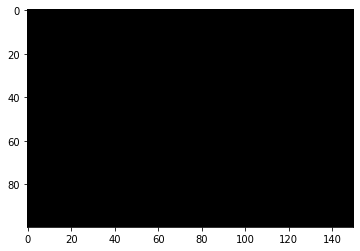

In [ ]:
#plotting the brightness only
rgb2hsv=cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)
plt.imshow(rgb2hsv[:,:,2],cmap='gray')

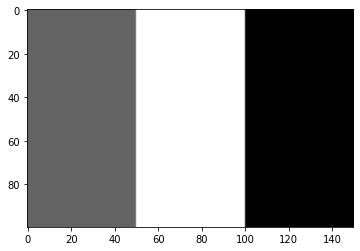

In [ ]:
#convert to greyscale image properly
rgb2gray=cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(rgb2gray,cmap='gray')

# Exercise

* make a Flag of the Netherlands

# Read colour images
* Plt reads as RGB
* OpenCV reads as BGR

In [ ]:
#Matplotlib method
cim = plt.imread(r'tulips.jpg')
cim = cim[:,:,:] 
R = cim[:,:,0]
G = cim[:,:,1]
B = cim[:,:,2]

In [ ]:
#OpenCV method
#cim = cv2.imread(r'tulips.jpg')
#cim = cim[:,:,::-1] #reverse
#R = cim[:,:,0]
#G = cim[:,:,1]
#B = cim[:,:,2]

### Channel Separation View
- Visualise the full RGB frame alongside its individual planes to see how each contributes to the composite.
- Relate the greyscale channel images to saturation concepts (a missing plane drives saturation).

### Channel Panel
- Provide a consistent view of the RGB image and individual channels to interpret saturation and hue relationships.

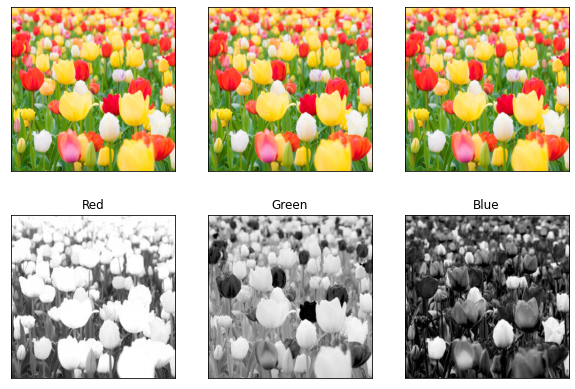

In [ ]:
plt.figure(figsize = (10,7))

plt.subplot(231)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Green')

plt.subplot(236)
plt.imshow(B,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Blue')
plt.show()

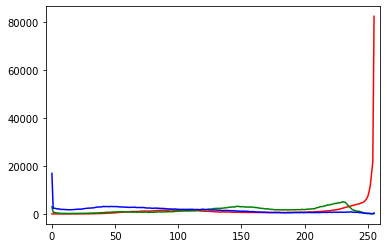

In [ ]:
#histogram
from matplotlib import pyplot as plt
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([cim],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([-5,260]) #expand the x axis to see the curves better.
plt.show()

# Exercise
* Use cv2.subtract(image1, amount) function to reduce the intensity of Red colour in the image.
* Plot the new image and original side by side. How does the histogram look like now?
* (optional) select your own colour images and investigate the RBG colour planes.

# RGB to HSV conversion

### Manual RGB→HSV Walkthrough
- Implement the piecewise hue equations from the slides to cement the maths behind `cv2.cvtColor`.
- Note the `scaleFactor` hook for Microsoft-style saturation scaling.

In [ ]:
def f_rgb_to_hsv(r, g, b,scaleFactor): 
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    cmax = max(r, g, b)    # maximum of r, g, b 
    cmin = min(r, g, b)    # minimum of r, g, b 
    diff = cmax-cmin       # diff of cmax and cmin. 
    if cmax == cmin:  
        h = 0
    elif cmax == r:  
        h = (60 * ((g - b) / diff) + 0) % 360
    elif cmax == g: 
        h = (60 * ((b - r) / diff) + 120) % 360
    elif cmax == b: 
        h = (60 * ((r - g) / diff) + 240) % 360
   
    if h < 0:
        h = h + 360
    if cmax == 0: 
        s = 0
    else: 
        s = (diff / cmax) * scaleFactor
    v = cmax * scaleFactor
    return h, s, v 

In [ ]:
print(f_rgb_to_hsv(100,200,50,100))

(100.0, 75.0, 78.43137254901961)


### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [ ]:
im = cv2.imread(r'tulips.jpg')

In [ ]:
HsvIm = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
cv2.cvtColor(im,cv2.COLOR_HSV2BGR)

array([[[209,  28, 255],
        [224,  27, 255],
        [232,  27, 255],
        ...,
        [224, 249,  66],
        [199, 246,  70],
        [163, 243,  73]],

       [[209,  28, 255],
        [224,  27, 255],
        [232,  27, 255],
        ...,
        [255, 209,  57],
        [254, 247,  62],
        [220, 251,  65]],

       [[232,  29, 255],
        [232,  29, 255],
        [239,  29, 255],
        ...,
        [255, 137,  47],
        [255, 174,  52],
        [255, 208,  55]],

       ...,

       [[ 25,  39,  46],
        [ 25,  38,  46],
        [ 26,  38,  48],
        ...,
        [120, 109,  43],
        [ 90,  98,  41],
        [ 72,  87,  39]],

       [[ 25,  40,  45],
        [ 25,  39,  46],
        [ 26,  38,  48],
        ...,
        [115, 105,  41],
        [ 93,  97,  41],
        [ 79,  88,  39]],

       [[ 25,  38,  44],
        [ 25,  40,  46],
        [ 27,  39,  49],
        ...,
        [114,  96,  41],
        [ 98,  94,  40],
        [ 88,  90,  39]]

In [ ]:
type(HsvIm)

numpy.ndarray

In [ ]:
HsvIm.shape

(638, 640, 3)

### Inspect Raw Array
- Printing the array reveals numerical structure, reinforcing that every pixel is just a sample from the frame buffer.

In [ ]:
img = cv2.imread(r'tulips.jpg')

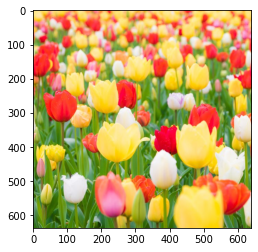

In [ ]:
plt.imshow(img[:,:,::-1])

In [ ]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

### HSV Swatch Card
- Populate hue along columns and saturation down rows with full value to build the colour wheel described in lecture.
- Reconfirm how hue wraps at 360 degrees and saturation drives distance from the white axis.

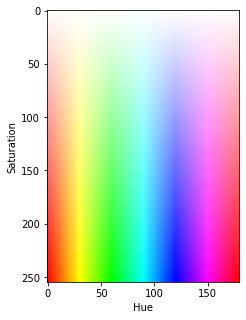

In [ ]:
hsv_card = np.zeros((255,180,3), dtype='uint8')
for x in range(0,180):
  hsv_card[:,x,0]=x
for y in range(0,255):
  hsv_card[y,:,1]=y
hsv_card[:,:,2] = 255 #V
hsv_card_rgb=cv2.cvtColor(hsv_card,cv2.COLOR_HSV2RGB)
hsv_card_bgr=cv2.cvtColor(hsv_card,cv2.COLOR_HSV2BGR)
plt.figure(figsize = (8,5))

plt.xlabel('Hue')
plt.ylabel('Saturation')

plt.imshow(hsv_card_rgb)

#Create a mask for the red tulips

In [ ]:
lr = np.array([0,120,70])
ur = np.array([8,255,255])
mask1 = cv2.inRange(hsv,lr,ur)

In [ ]:
lr = np.array([170,120,70])
ur = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lr,ur)

### Dual Hue Mask
- Combine lower and upper hue ranges so both red lobes (near 0° and 180°) are captured, matching the segmentation workflow.
- Remember saturation/value thresholds fend off dull background pixels.

In [ ]:
mask = mask1 | mask2

### Apply the Mask
- Use bitwise AND to keep only the pixels selected by the red mask, demonstrating colour-based segmentation outcomes.
- Cross-check with the HSV card to validate that the mask picks the intended hues.

In [ ]:
res = cv2.bitwise_and(img,img,mask=mask)

### Mask Application Visual
- Show original, mask, and masked result to connect theoretical hue filtering with actual segmentation output.

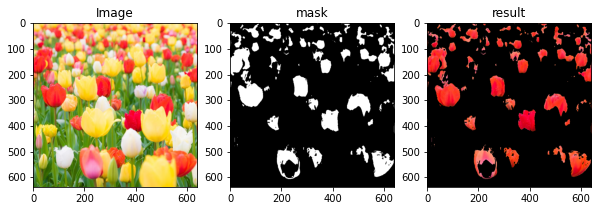

In [ ]:
plt.figure(figsize = (10,7))
plt.subplot(131)
plt.title('Image')
plt.imshow(img[:,:,::-1])
plt.subplot(132)
plt.title('mask')
plt.imshow(mask,cmap="gray")
plt.subplot(133)
plt.title('result')
plt.imshow(res[:,:,::-1])
plt.show()

### HSV Mask Verification
- Validate masking ranges on the HSV swatch card to cross-check coverage.

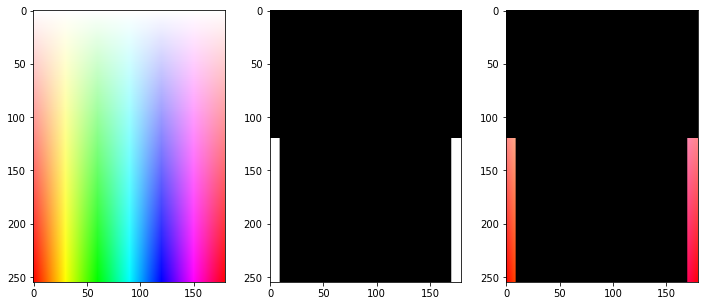

In [ ]:
#Verify the mask
lr = np.array([0,120,70])
ur = np.array([8,255,255])
mask1 = cv2.inRange(hsv_card,lr,ur)

lr = np.array([170,120,70])
ur = np.array([180,255,255])
mask2 = cv2.inRange(hsv_card,lr,ur)

mask = mask1 | mask2

hsv_masked=cv2.bitwise_and(hsv_card_bgr,hsv_card_bgr,mask=mask)

plt.figure(figsize = (12,5))
plt.subplot(131)
plt.imshow(hsv_card_rgb)
plt.subplot(132)
plt.imshow(mask,cmap="gray")
plt.subplot(133)
plt.imshow(hsv_masked[:,:,::-1])

# Exercise
* segment out all yellow tulips
* (optional) can you change their colour to blue?